### Первичный анализ

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# данные по росту и весу
data = pd.read_csv('weights_heights.csv', index_col='Index')

In [3]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


Построим гистограммы распределения признаков (роста и веса)

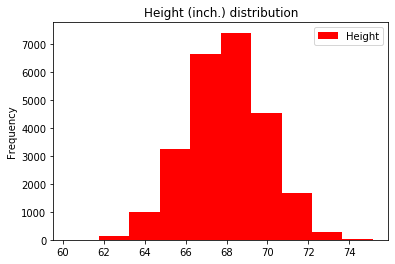

In [4]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')
plt.show()

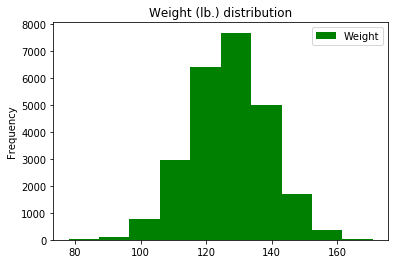

In [5]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (lb.) distribution')
plt.show()

Отобразим попарные зависимости, добавив 3-й признак для наглядности

In [6]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [7]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

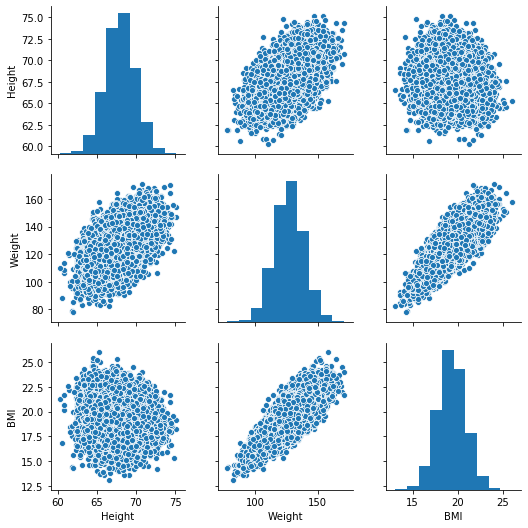

In [8]:
plot = sns.pairplot(data)

Изобразим "ящики с усами"

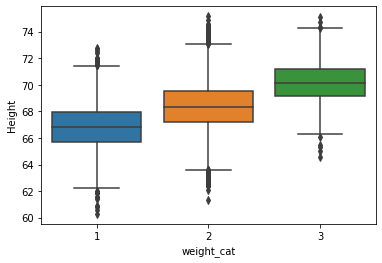

In [9]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
sns.boxplot(x='weight_cat', y='Height', data=data)
plt.show()

Постройте scatter plot зависимости роста от веса, используя метод plot

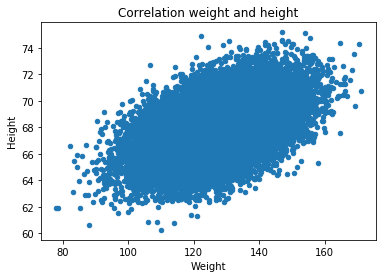

In [10]:
data.plot(x='Weight', y='Height', kind='scatter', title='Correlation weight and height')
plt.show()

### Минимизация квадратичной ошибки

Напишим функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [11]:
def error_sq(w0, w1):
    return np.sum((data['Height'] - (w0 + w1 * data['Weight']))**2)

Проведем на графике две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$.

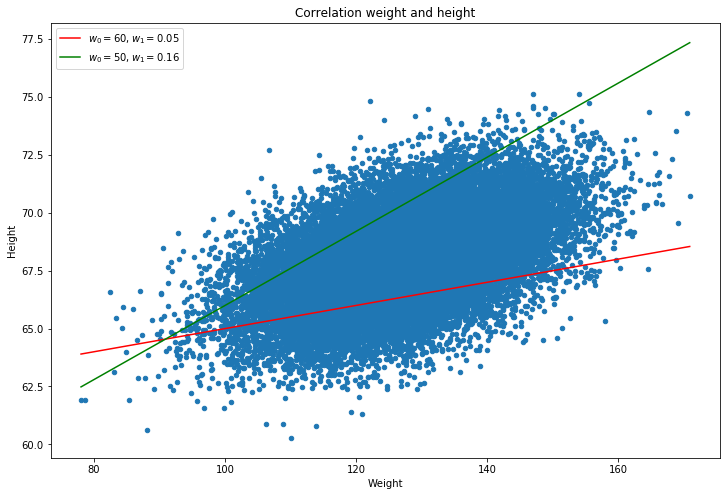

In [15]:
data.plot(x='Weight', y='Height', kind='scatter', title='Correlation weight and height', figsize=(12,8))
x = np.linspace(np.min(data['Weight']), np.max(data['Weight']))

y = [60 + 0.05 * i for i in x]
plt.plot(x,y, color='red')

y = [50 + 0.16 * i for i in x]
plt.plot(x,y, color='green')

plt.legend(('$w_0=60, w_1=0.05$', '$w_0=50, w_1=0.16$'))
plt.show()

Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.
Построим график зависимости функции ошибки, параметра $w_1$ при $w_0$ = 50.

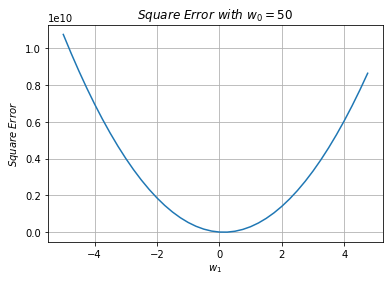

In [16]:
w0 = 50.0
x = np.arange(-5.0, 5.0, 0.25)
plt.plot(x, [error_sq(w0, w1) for w1 in x])
plt.xlabel('$w_1$')
plt.ylabel('$Square\ Error$')
plt.title('$Square\ Error \ with \ w_0=50$')
plt.grid(True) #Сетка
plt.show()

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$. Найдем минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Провед на графике прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное оптимальное значение параметра $w_1$. 

In [18]:
from scipy.optimize import minimize_scalar

optim_res_1 = minimize_scalar(lambda x: error_sq(w0, x), bounds=(-5,5))
print(optim_res_1)

     fun: 79512.21728699499
    nfev: 9
     nit: 5
 success: True
       x: 0.1410920372883438


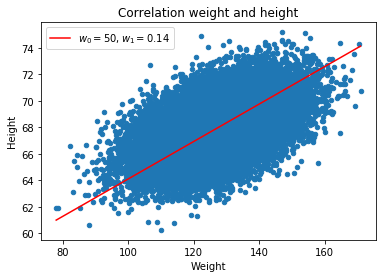

In [19]:
data.plot(x='Weight', y='Height', kind='scatter', title='Correlation weight and height')

x = np.linspace(np.min(data['Weight']), np.max(data['Weight']))
optim_res_1 = optim_res_1.x   
y = [w0 + optim_res_1 * i for i in x]
plt.plot(x,y, color='red')
plt.legend(('$w_0=50, w_1=%.2f$' % optim_res_1,))
plt.show()

Отобразим функцию $z(x,y) = sin(\sqrt{x^2+y^2})$ для значений $x$ и $y$ из интервала [-5,5] c шагом 0.25.

In [21]:
from mpl_toolkits.mplot3d import Axes3D

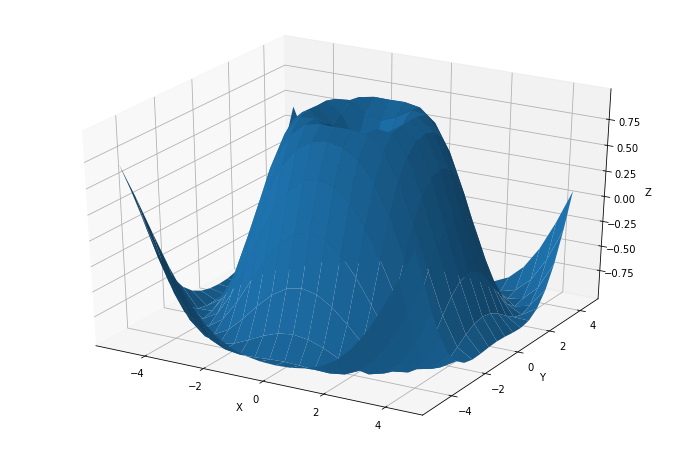

In [24]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Построем 3D-график зависимости функции ошибки, от параметров $w_0$ и $w_1$.

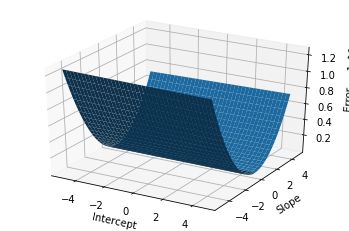

In [30]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.array([error_sq(w0, w1) for w0, w1 in zip(X.flatten(), Y.flatten())]).reshape(X.shape)
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

Найдем минимум функции для значений параметра $w_0$ в диапазоне [-100, 100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Провем на графике прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$.

In [32]:
from scipy.optimize import minimize

optim_res = minimize(lambda w: error_sq(w[0], w[1]), x0=[0, 0], method='L-BFGS-B', bounds=([-100.0, 100.0], [-5.0, 5.0]))
print(optim_res)

      fun: 67545.28708667471
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00291038, 0.        ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 4
   status: 0
  success: True
        x: array([57.57179162,  0.08200637])


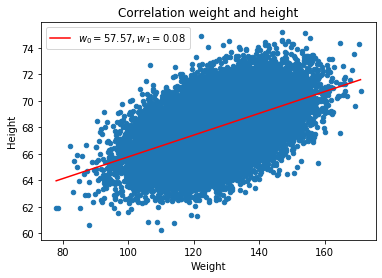

In [33]:
data.plot(x='Weight', y='Height', kind='scatter', title='Correlation weight and height')
optim_res_0, optim_res_1 = optim_res.x
x = np.linspace(np.min(data['Weight']), np.max(data['Weight']))
y = []
for i in range(len(x)):
    y.append(optim_res_0 + optim_res_1 * x[i])
plt.plot(x, y, color='red')
plt.legend(('$w_0=%.2f, w_1=%.2f$' % (optim_res_0, optim_res_1),))
plt.show()